In [1]:
import pandas as pd
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [5]:
#load model
from tensorflow.keras.models import load_model
model = load_model('../model/rnn_model.keras')

#load tokenizer
import json
from tensorflow.keras.preprocessing.text import tokenizer_from_json

with open('../model/tokenizer.json', 'r', encoding='utf-8') as f:
    tokenizer_json = json.load(f)
    tokenizer = tokenizer_from_json(tokenizer_json)
    

c:\Users\Acer\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Memuat data
file_path = 'dataset/mental_health_sentiment.csv'
df = pd.read_csv(file_path)

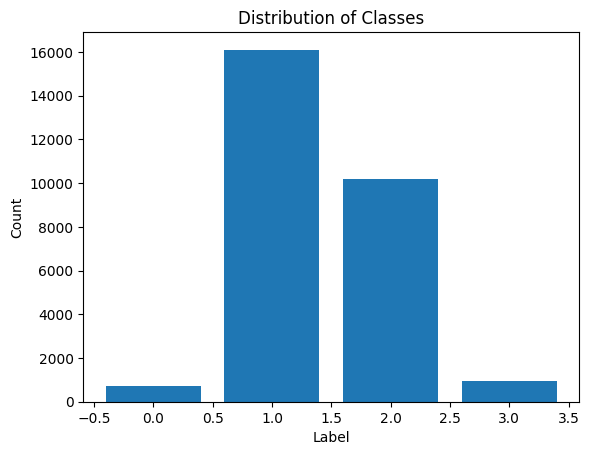

In [ ]:
#Meriksa Distribusi kelasnya

import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan label
grouped_data = df.groupby('label')

# Menghitung jumlah data untuk setiap label
counts = grouped_data['label'].count()

# Membuat bar chart
plt.bar(counts.index, counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()


In [ ]:
# Separate majority and minority classes
df_majority_1 = df[df['label'] == 1]
df_majority_2 = df[df['label'] == 2]
df_minority_3 = df[df['label'] == 3]
df_minority_0 = df[df['label'] == 0]

In [ ]:
# Oversample minority classes
df_minority_3_upsampled = resample(df_minority_3, replace=True, n_samples=16102, random_state=123)
df_minority_0_upsampled = resample(df_minority_0, replace=True, n_samples=16102, random_state=123)

In [ ]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([df_majority_1, df_majority_2, df_minority_3_upsampled, df_minority_0_upsampled])

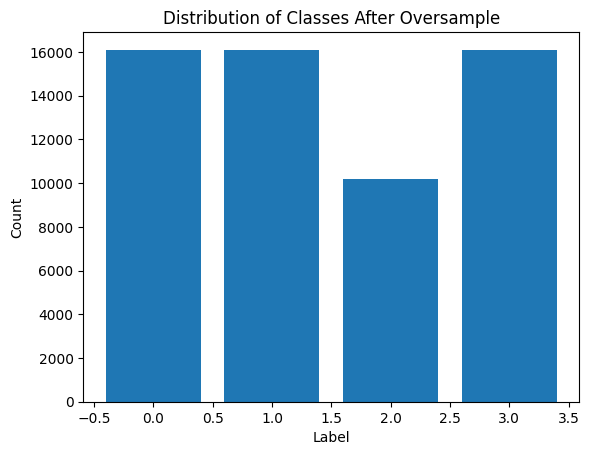

In [ ]:
#Distribusi kelasnya setelah oversample

import matplotlib.pyplot as plt
# Mengelompokkan data berdasarkan label
grouped_data = df_upsampled.groupby('label')

# Menghitung jumlah data untuk setiap label
counts = grouped_data['label'].count()

# Membuat bar chart
plt.bar(counts.index, counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Classes After Oversample')
plt.show()


In [ ]:
# Prepare the text data
X = df_upsampled['text'].values
y = df_upsampled['label'].values

In [ ]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [ ]:
# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5
1463/1463 [==============================] - 87s 46ms/step - loss: 0.7470 - accuracy: 0.6729 - val_loss: 0.4155 - val_accuracy: 0.8366
Epoch 2/5
1463/1463 [==============================] - 63s 43ms/step - loss: 0.3718 - accuracy: 0.8487 - val_loss: 0.3367 - val_accuracy: 0.8604
Epoch 3/5
1463/1463 [==============================] - 65s 45ms/step - loss: 0.3417 - accuracy: 0.8621 - val_loss: 0.3243 - val_accuracy: 0.8773
Epoch 4/5
1463/1463 [==============================] - 66s 45ms/step - loss: 0.3604 - accuracy: 0.8483 - val_loss: 0.3530 - val_accuracy: 0.8426
Epoch 5/5
1463/1463 [==============================] - 64s 44ms/step - loss: 0.2995 - accuracy: 0.8700 - val_loss: 0.2747 - val_accuracy: 0.8821


In [ ]:
#Laporan Klasifikasi

import numpy as np
# Evaluate the model
y_pred = model.predict(X_test)

# Generate the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, np.argmax(y_pred, axis=1))

# Print the report
print(report)


366/366 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3269
           1       0.82      0.79      0.80      3226
           2       0.69      0.66      0.68      1975
           3       0.96      0.99      0.98      3234

    accuracy                           0.88     11704
   macro avg       0.86      0.86      0.86     11704
weighted avg       0.88      0.88      0.88     11704



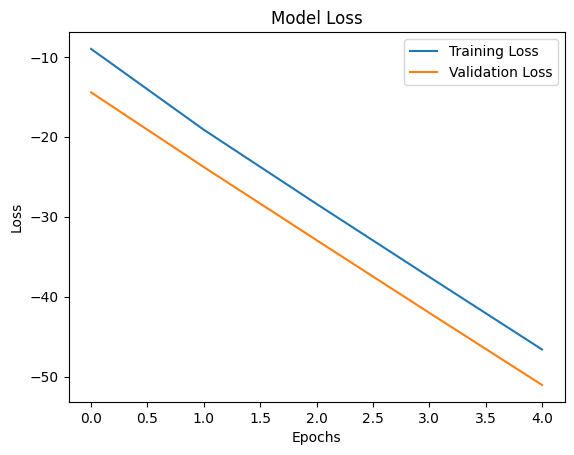

In [ ]:
# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()